## Load the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\data sets/uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


### Explore the data set

In [4]:
df.shape

(200000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df[df.duplicated()].sum()

Unnamed: 0           0.0
key                  0.0
fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

### Checking for missing values

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

### for 'pickup_longitude','dropoff_longitude','pickup_latitude','dropoff_latitude'

In [9]:
invalid_piclon=df[(df['pickup_longitude']<-180)|(df['pickup_longitude']>180)]
invalid_droplon=df[(df['dropoff_longitude']<-180)|(df['dropoff_longitude']>180)]  
invalid_piclat=df[(df['pickup_latitude']<-90)|(df['pickup_latitude']>90)]
invalid_droplat=df[(df['dropoff_latitude']<-90)|(df['dropoff_latitude']<90)]

### impute invalid data with 'nan'

In [10]:
df['pickup_longitude']=np.where((df['pickup_longitude']<-180)|(df['pickup_longitude']>180),np.nan,df['pickup_longitude'])

In [11]:
df['dropoff_longitude']=np.where((df['dropoff_longitude']<-180)|(df['dropoff_longitude']>180),np.nan,df['dropoff_longitude'])
df['pickup_latitude']=np.where((df['pickup_latitude']<-90)|(df['pickup_latitude']>90),np.nan,df['pickup_latitude'])
df['dropoff_latitude']=np.where((df['dropoff_latitude']<-90)|(df['dropoff_latitude']>90),np.nan,df['dropoff_latitude'])


In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     7
pickup_latitude      4
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

### Then impute  missing values with median

In [13]:
df['pickup_longitude']=df['pickup_longitude'].fillna(df['pickup_longitude'].median())

In [14]:
df['pickup_latitude']=df['pickup_latitude'].fillna(df['pickup_latitude'].median())
df['dropoff_longitude']=df['dropoff_longitude'].fillna(df['dropoff_longitude'].median())
df['dropoff_latitude']=df['dropoff_latitude'].fillna(df['dropoff_latitude'].median())

### Find the distance 

In [15]:
from geopy.distance import great_circle

In [16]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    
 
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    
 
    return great_circle(start_coordinates,stop_coordinates).km

In [17]:
df['distance']=df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [18]:
df['distance']=round(df['distance'],0)

<Axes: >

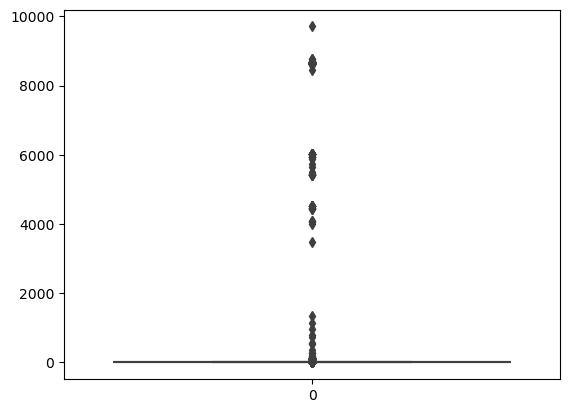

In [19]:
df['distance']
sns.boxplot(df['distance'])

### Handling the outliers

In [20]:
df['distance'].describe()

count    200000.000000
mean         20.610985
std         380.225836
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        9710.000000
Name: distance, dtype: float64

In [21]:
q1=df['distance'].quantile(0.25)
q3=df['distance'].quantile(0.90)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df.loc[df['distance']>=ub,'distance']=ub
df.loc[df['distance']<=lb,'distance']=lb

In [22]:
df['distance'].describe()

count    200000.000000
mean          3.201700
std           3.245924
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          16.000000
Name: distance, dtype: float64

<Axes: >

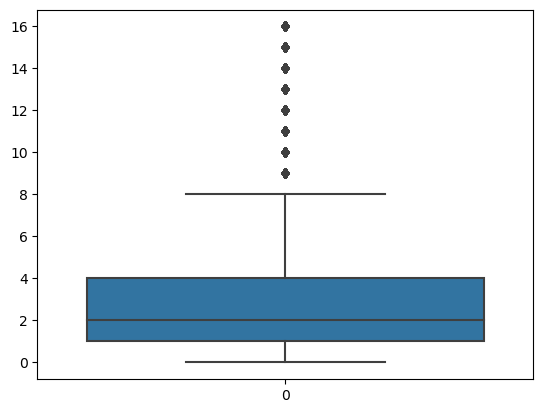

In [23]:
sns.boxplot(df['distance'])

### outliers checking for target variable

In [24]:
df['fare_amount'].describe()

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

### Target feature has a lot of outliers

In [25]:
q1=df['fare_amount'].quantile(0.30)

In [26]:
q3=df['fare_amount'].quantile(0.75)

In [27]:
iqr=q3-q1

In [28]:
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [29]:
df.loc[df['fare_amount']>=ub,'fare_amount']=ub
df.loc[df['fare_amount']<=lb,'fare_amount']=lb

<Axes: xlabel='fare_amount'>

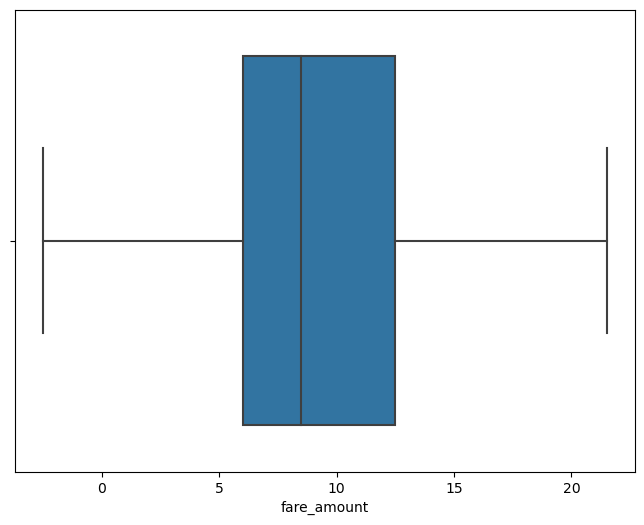

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x='fare_amount',data=df)

<Axes: xlabel='fare_amount', ylabel='Count'>

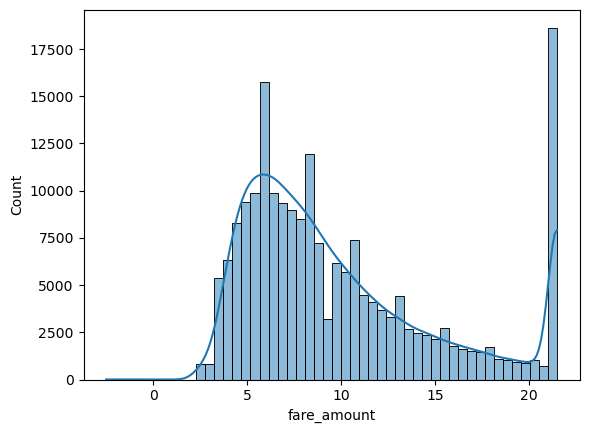

In [31]:
sns.histplot(df['fare_amount'],bins=50,kde=True)

C:\Users\Sony\AppData\Local\Temp\ipykernel_3544\2772932758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'])


<Axes: xlabel='fare_amount', ylabel='Density'>

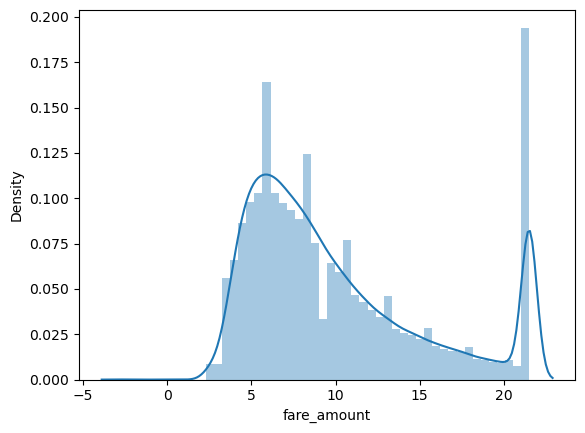

In [32]:
sns.distplot(df['fare_amount'])

## Feature Engineering

In [33]:
df['date']=df['pickup_datetime'].apply(lambda x:x.split(' ')[0])

In [34]:
df['pickup_time']=df['pickup_datetime'].apply(lambda x:x.split(' ')[1])

In [35]:
df['date']=pd.to_datetime(df['date'],format='%Y-%M-%d')

In [36]:
df['year']=df['date'].dt.year

In [37]:
df['hour']=df['pickup_time'].apply(lambda x:x.split(':')[0])

In [38]:
df['hour']=df['hour'].astype(int)

In [39]:
df=df.drop(['date','pickup_time'],axis=1)

In [40]:
df=df.drop(['key','Unnamed: 0','pickup_datetime'],axis=1)

In [41]:
b = [-1,12,16,24]
l = ['Morning','afterNoon','Eve']
df['session'] = pd.cut(df['hour'], bins=b, labels=l)

In [48]:
df['session']

0               Eve
1               Eve
2               Eve
3           Morning
4               Eve
            ...    
199995      Morning
199996      Morning
199997      Morning
199998    afterNoon
199999      Morning
Name: session, Length: 200000, dtype: category
Categories (3, object): ['Morning' < 'afterNoon' < 'Eve']

In [42]:
bins=[-1,3,8,17]
labels=['short','medium','long']
df['distance_category']=pd.cut(df['distance'],bins=bins,labels=labels)

In [49]:
df['distance_category']

0          short
1          short
2         medium
3          short
4         medium
           ...  
199995     short
199996     short
199997      long
199998    medium
199999    medium
Name: distance_category, Length: 200000, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [43]:
df['distance_category'].isnull().sum()

0

In [44]:
df=df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance'],axis=1)

In [45]:
df=df.drop(['hour','year'],axis=1)

In [46]:
df.head(20)

,fare_amount,passenger_count,session,distance_category
0,7.5,1,Eve,short
1,7.7,1,Eve,short
2,12.9,1,Eve,medium
3,5.3,3,Morning,short
4,16.0,5,Eve,medium
5,4.9,1,Morning,short
6,21.5,5,Morning,long
7,2.5,1,afterNoon,short
8,9.7,1,Morning,short
9,12.5,1,Eve,medium


## Visualization

### univariate analyses

<Axes: xlabel='session', ylabel='count'>

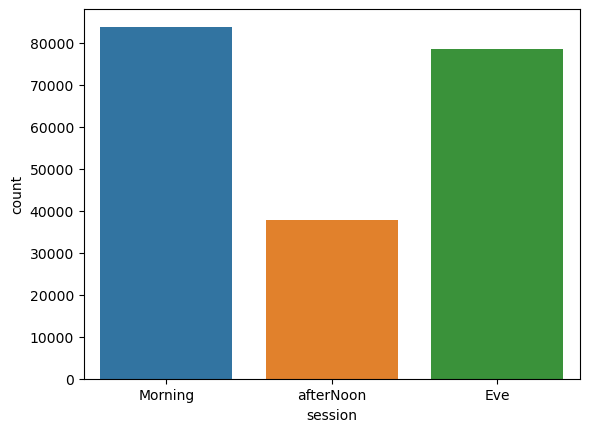

In [51]:
sns.countplot(x='session',data=df)

<Axes: xlabel='distance_category', ylabel='count'>

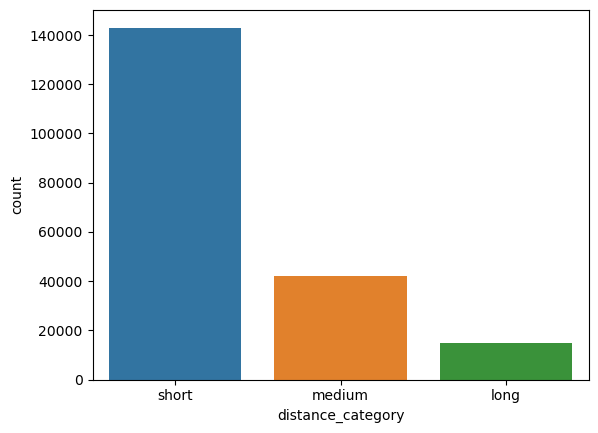

In [54]:
sns.countplot(x='distance_category',data=df)

### bivariate

<Axes: xlabel='session'>

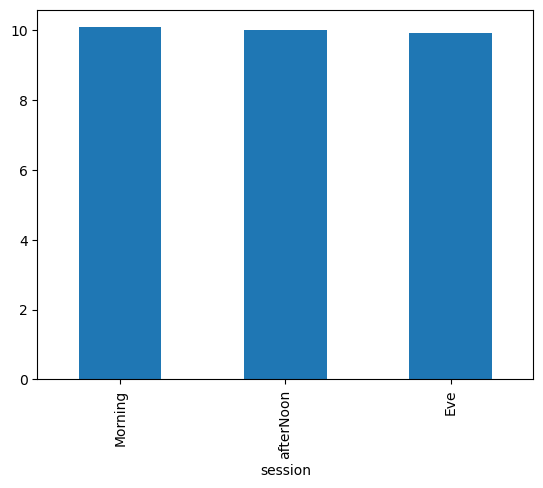

In [56]:
df.groupby("session")['fare_amount'].mean().plot.bar()

<Axes: xlabel='distance_category'>

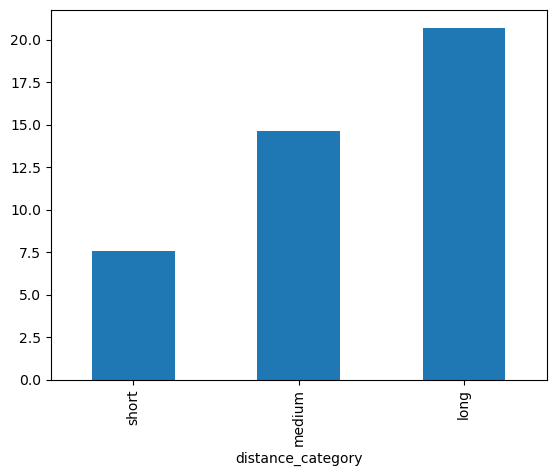

In [57]:
df.groupby("distance_category")['fare_amount'].mean().plot.bar()

<Axes: xlabel='passenger_count'>

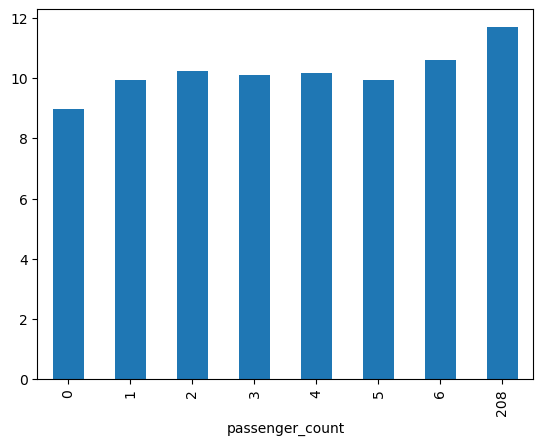

In [58]:
df.groupby("passenger_count")['fare_amount'].mean().plot.bar()

<Axes: xlabel='distance_category', ylabel='fare_amount'>

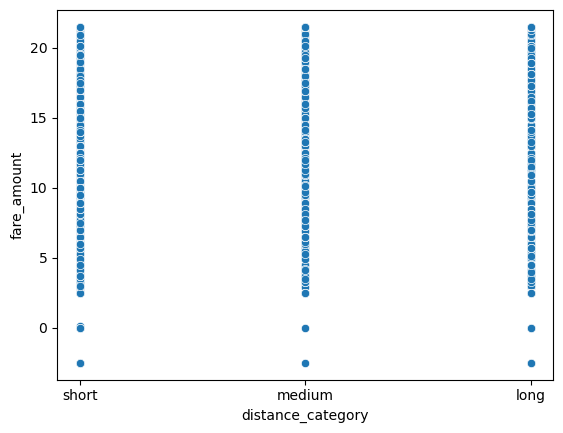

In [61]:
sns.scatterplot(y='fare_amount',x='distance_category',data=df)

<Axes: xlabel='session', ylabel='fare_amount'>

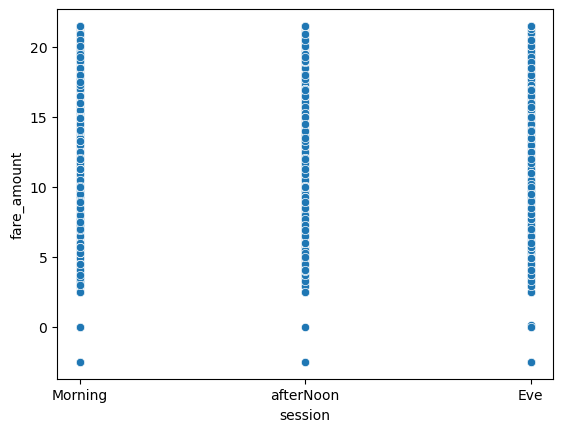

In [62]:
sns.scatterplot(y='fare_amount',x='session',data=df)

<Axes: xlabel='session', ylabel='fare_amount'>

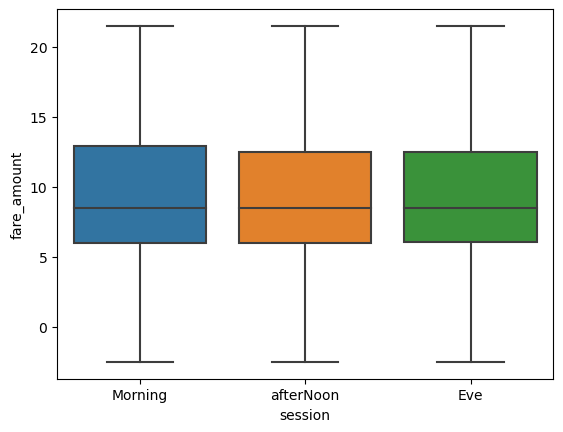

In [63]:
sns.boxplot(x = 'session', y = 'fare_amount', data = df)

### Create dummies for categorical variable

In [65]:
session_dummy = pd.get_dummies(df['session'],drop_first=True)

In [66]:
session_dummy

,afterNoon,Eve
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
199995,0,0
199996,0,0
199997,0,0
199998,1,0


In [67]:
df=pd.concat([df,session_dummy],axis=1)

In [68]:
df=df.drop('session',axis=1)

In [69]:
distance_dummy=pd.get_dummies(df['distance_category'],drop_first=True)
df=pd.concat([df,distance_dummy],axis=1)

In [70]:
df=df.drop('distance_category',axis=1)

In [71]:
df

,fare_amount,passenger_count,afterNoon,Eve,medium,long
0,7.5,1,0,1,0,0
1,7.7,1,0,1,0,0
2,12.9,1,0,1,1,0
3,5.3,3,0,0,0,0
4,16.0,5,0,1,1,0
...,...,...,...,...,...,...
199995,3.0,1,0,0,0,0
199996,7.5,1,0,0,0,0
199997,21.5,2,0,0,0,1
199998,14.5,1,1,0,1,0


In [72]:
df.corr()

,fare_amount,passenger_count,afterNoon,Eve,medium,long
fare_amount,1.000000,0.013734,0.000369,-0.011899,0.451646,0.571166
passenger_count,0.013734,1.000000,0.000378,0.019067,0.004637,0.004785
afterNoon,0.000369,0.000378,1.000000,-0.387252,-0.051268,0.012968
Eve,-0.011899,0.019067,-0.387252,1.000000,0.022876,-0.023828
medium,0.451646,0.004637,-0.051268,0.022876,1.000000,-0.146091
long,0.571166,0.004785,0.012968,-0.023828,-0.146091,1.000000


<Axes: >

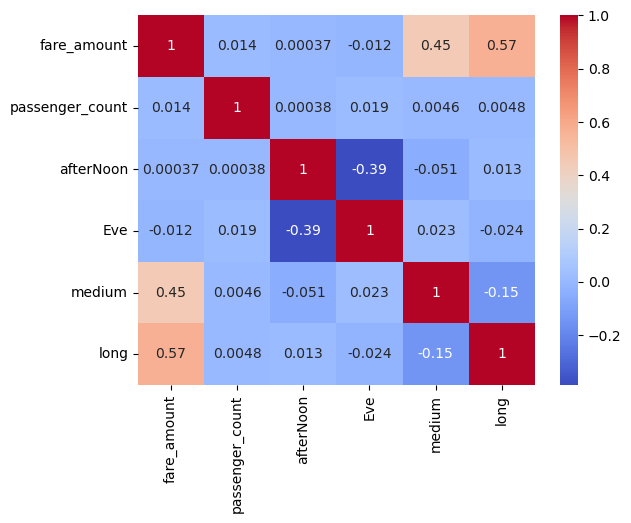

In [73]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

### train test split 

In [74]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,train_size=0.7,random_state=100)

In [75]:
df_train.shape

(140000, 6)

In [76]:
df_test.shape

(60000, 6)

### standardization

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [78]:
col=['fare_amount','passenger_count']
df_train[col]=scaler.fit_transform(df_train[col])
df_test[col]=scaler.transform(df_test[col])

<Axes: >

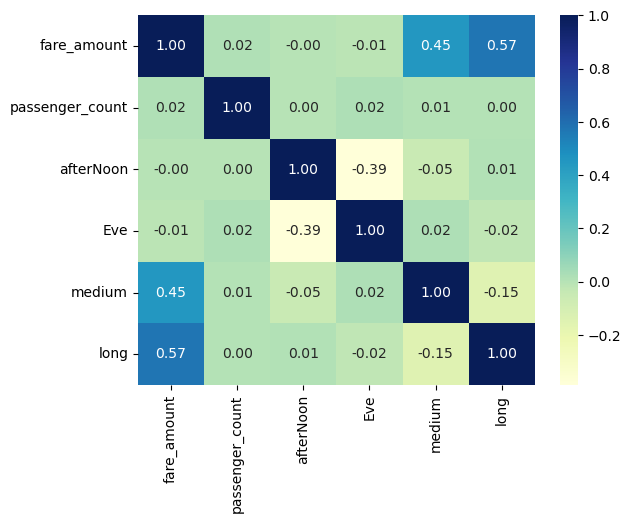

In [79]:
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",fmt=".2f")

### correlation analysis

### From the correlation matrix  we conclude that 
1:Medium and long distance are positivelt correlated with the target variable.
2Afternoon and evening time are negatively correlated with the target variable.
3:Passenger count is very less but positevely correlated with target variable.

## Dividing the data set in to X and Y

In [80]:
y_train = df_train.pop('fare_amount')
X_train = df_train

In [82]:
X_train

,passenger_count,afterNoon,Eve,medium,long
195896,0.931428,0,0,0,0
47114,0.224937,1,0,1,0
144875,-0.481554,0,0,0,0
184791,0.224937,0,1,0,0
123269,0.224937,0,0,0,0
...,...,...,...,...,...
194442,-0.481554,0,1,0,0
65615,0.224937,0,1,0,0
77655,-0.481554,0,0,0,0
56088,-0.481554,0,1,0,0


In [84]:
y_train

195896   -0.379462
47114     0.621619
144875   -1.040553
184791   -1.134994
123269   -0.568345
            ...   
194442    0.092746
65615    -0.360573
77655     0.848279
56088     0.546066
38408     0.168299
Name: fare_amount, Length: 140000, dtype: float64

## Building the regression model

### Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [85]:
import statsmodels.api as sm
x_train=X_train[['medium','long']]
# Add a constant
X_train_lm = sm.add_constant(x_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [86]:
lr.params

const    -0.466331
medium    1.341521
long      2.492033
dtype: float64

In [87]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                 1.142e+05
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:35:25   Log-Likelihood:            -1.3092e+05
No. Observations:              140000   AIC:                         2.618e+05
Df Residuals:                  139997   BIC:                         2.619e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4663      0.002   -239.470      0.0

In [88]:

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [89]:
lr.params

const             -0.474512
passenger_count    0.008997
afterNoon          0.045085
Eve               -0.001768
medium             1.343455
long               2.491467
dtype: float64

In [90]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                 4.576e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:37:32   Log-Likelihood:            -1.3084e+05
No. Observations:              140000   AIC:                         2.617e+05
Df Residuals:                  139994   BIC:                         2.618e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4745      0.003   -171.496      0.000      -0.480      -0.469
passenger_count     0.0090      0.002      5.462      0.000       0.006       0.012
afterNoon           0.0451      0.005      9.865      0.000       0.036       0.054
Eve                -0.0018      0.004     -0.483      0.629      -0.009       0.005
medium              1.3435      0.004    328.574      0.000       1.335       1.351
long                2.4915      0.006    391.516      0.000       2.479       2.504
==============================================================================
Omnibus:                    21689.605   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66964.924
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                       5.977   Cond. No.                         4.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### checking VIF

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Eve,1.14
3,medium,1.14
1,afterNoon,1.05
4,long,1.05
0,passenger_count,1.00


#### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

#### As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Eve as it has a very high p-value of 0.629. Let's go ahead and drop this variables

### Drop the Eve variable and build the new model

In [93]:
x = X_train.drop('Eve', 1,)

C:\Users\Sony\AppData\Local\Temp\ipykernel_3544\2134575768.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = X_train.drop('Eve', 1,)


In [95]:
X_train_lm = sm.add_constant(x)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [96]:
lr.params

const             -0.475372
passenger_count    0.008979
afterNoon          0.045940
medium             1.343454
long               2.491526
dtype: float64

In [97]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                 5.720e+04
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:44:02   Log-Likelihood:            -1.3084e+05
No. Observations:              140000   AIC:                         2.617e+05
Df Residuals:                  139995   BIC:                         2.617e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4754      0.002   -224.505      0.000      -0.480      -0.471
passenger_count     0.0090      0.002      5.453      0.000       0.006       0.012
afterNoon           0.0459      0.004     10.905      0.000       0.038       0.054
medium              1.3435      0.004    328.575      0.000       1.335       1.351
long                2.4915      0.006    391.598      0.000       2.479       2.504
==============================================================================
Omnibus:                    21694.127   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66984.822
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                       5.977   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now as you can see, the p-values are within an acceptable range. So we go ahead and make our predictions using this model only.

### Residual Analysis of the train data

In [98]:
y_pred=lr.predict(X_train_lm)

C:\Users\Sony\AppData\Local\Temp\ipykernel_3544\3208309788.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_pred), bins = 20)


Text(0.5, 0, 'Errors')

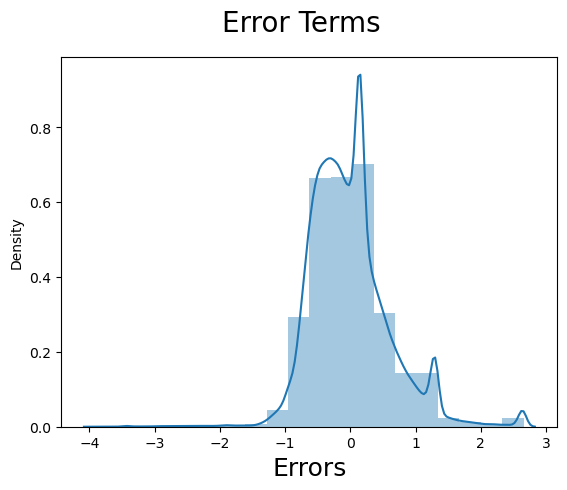

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Making Predictions Using the Final Model

In [101]:
y_test=df_test.pop("fare_amount")


In [105]:
x_test=df_test

In [106]:
x_test = sm.add_constant(x_test)


In [108]:
x = x_test.drop('Eve', 1,)

C:\Users\Sony\AppData\Local\Temp\ipykernel_3544\2431471883.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x_test.drop('Eve', 1,)


In [109]:
x

,const,passenger_count,afterNoon,medium,long
180481,1.0,-0.481554,1,0,0
8971,1.0,-0.481554,0,0,0
77027,1.0,2.344410,0,1,0
21656,1.0,0.931428,0,1,0
58303,1.0,-0.481554,0,0,0
...,...,...,...,...,...
188899,1.0,0.224937,0,0,0
98649,1.0,-0.481554,0,0,1
538,1.0,-0.481554,1,0,0
60387,1.0,-0.481554,0,0,0


In [110]:
y_pred = lr.predict(x)

## Model Evaluation

Text(0, 0.5, 'y_pred')

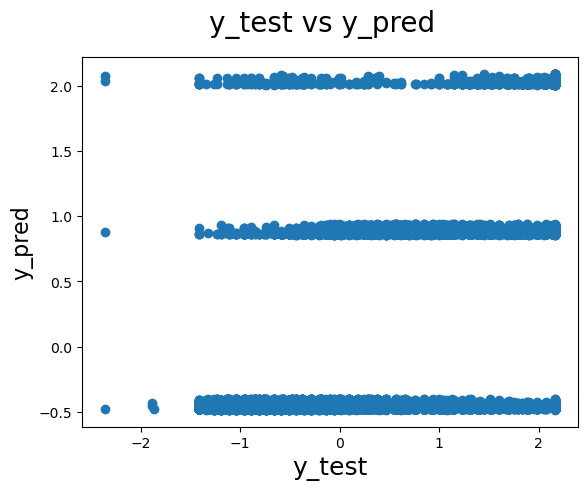

In [111]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 